In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_Kag = pd.read_csv('KAG_conversion_data.csv')
df_Kag.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
df_Kag.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [4]:
df_Kag.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
X = pd.get_dummies(df_Kag)
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.00,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.25,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.29,1,1,1,0,0,0,0,1


In [6]:
X= X.drop(columns = ['ad_id','xyz_campaign_id','fb_campaign_id', 'interest'] ,axis = 1)
X

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,7350,1,1.430000,2,1,1,0,0,0,0,1
1,17861,2,1.820000,2,0,1,0,0,0,0,1
2,693,0,0.000000,1,0,1,0,0,0,0,1
3,4259,1,1.250000,1,0,1,0,0,0,0,1
4,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,790253,135,198.710000,8,2,0,0,0,1,1,0


<AxesSubplot:>

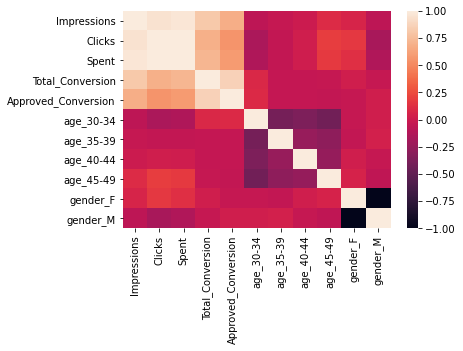

In [7]:
sns.heatmap(X.corr(),annot = False)

We dropped the columns because they were highly correlated


In [10]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X)
X_transformed = mms.transform(X)

In [12]:
from sklearn.cluster import KMeans

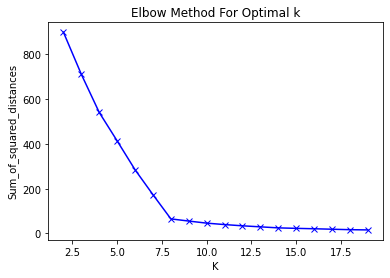

In [13]:
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_transformed)
    Sum_of_squared_distances.append(km.inertia_)
        
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
#From the elbow method, the elbow point is 8
#k = 8 
km = KMeans(n_clusters=8)
clusters = km.fit_predict(X)
Y_means = km.labels_
Y_means

array([0, 0, 0, ..., 5, 1, 6])

In [30]:
clusters

array([0, 0, 0, ..., 5, 1, 6])

In [31]:
clusters is Y_means

True

In [32]:
km.cluster_centers_

array([[1.50835187e+04, 2.69593496e+00, 3.94562602e+00, 1.13821138e+00,
        4.03252033e-01, 4.53658537e-01, 1.98373984e-01, 1.65853659e-01,
        1.82113821e-01, 4.66666667e-01, 5.33333333e-01],
       [7.91387588e+05, 1.50490196e+02, 2.28553137e+02, 8.50980392e+00,
        2.56862745e+00, 2.54901961e-01, 1.76470588e-01, 1.96078431e-01,
        3.72549020e-01, 7.25490196e-01, 2.74509804e-01],
       [2.82835632e+05, 4.96960000e+01, 7.67729600e+01, 3.50400000e+00,
        1.12000000e+00, 3.04000000e-01, 2.40000000e-01, 2.40000000e-01,
        2.16000000e-01, 4.40000000e-01, 5.60000000e-01],
       [2.41054375e+06, 3.29000000e+02, 5.53945001e+02, 3.85000000e+01,
        1.45000000e+01, 7.50000000e-01, 0.00000000e+00, 0.00000000e+00,
        2.50000000e-01, 2.50000000e-01, 7.50000000e-01],
       [1.09203529e+06, 1.96314286e+02, 3.00137428e+02, 1.46857143e+01,
        4.74285714e+00, 3.14285714e-01, 2.57142857e-01, 1.42857143e-01,
        2.85714286e-01, 6.00000000e-01, 4.00000000e-

In [33]:
df_Kag['Advert_Type'] = Y_means
df_Kag.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0


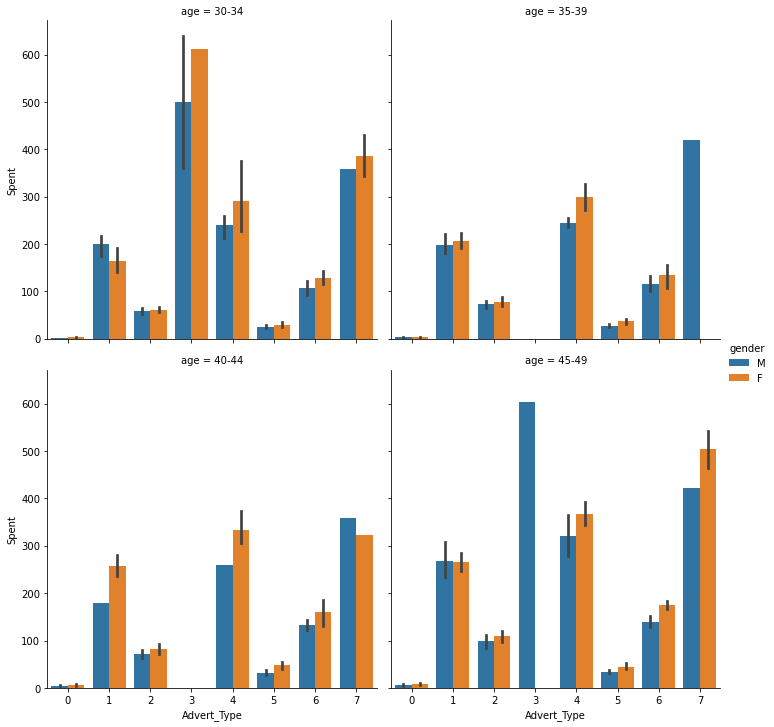

In [36]:
sns.catplot(x="Advert_Type", y="Spent",hue="gender",col ='age',kind="bar",data=df_Kag,col_wrap=2)

Company xyz's products aren't gender neutral.
Advet Type 3 ( 30 -34 ) and also (45 - 49) for only the male customers led to the highest and consistent amount of sales by customers.